# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [18]:


df_raw = pd.read_csv('previsao_de_renda.csv')

df_raw.head()



,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [19]:
df = df_raw.copy()

df.drop(['Unnamed: 0', 'mau', 'index'], axis = 1, inplace = True)


In [20]:


df.corr()



,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,0.063414
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,0.029827
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,1.000000


In [21]:
cmap = sns.diverging_palette(h_neg = 125, h_pos = 350, as_cmap = True, sep = 60, center = 'light')


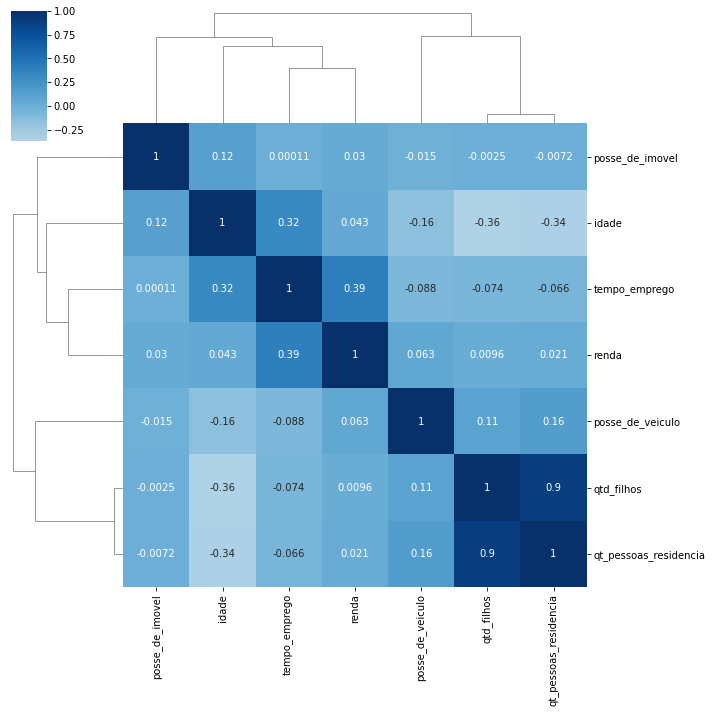

In [22]:
sns.clustermap(df.corr(), figsize = (10, 10), annot = True, center = 0, cmap = 'Blues')

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [26]:
df = df[['renda','tempo_emprego','posse_de_veiculo','idade']]
df

,renda,tempo_emprego,posse_de_veiculo,idade
0,3369.24,3.575342,False,36
1,6096.14,0.860274,True,42
2,5658.98,8.065753,True,31
3,7246.69,1.208219,True,50
4,4017.37,13.873973,False,52
...,...,...,...,...
14995,1193.29,2.046575,True,37
14996,2519.18,12.079452,True,30
14997,1586.85,2.161644,True,40
14998,6975.39,3.295890,False,47


In [31]:
# As duas variáveis mais relacionadas a renda são: tempo_emprego e idade


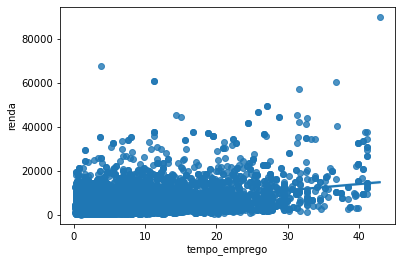

In [32]:
_ = sns.regplot(x = 'tempo_emprego', y = 'renda', data = df)

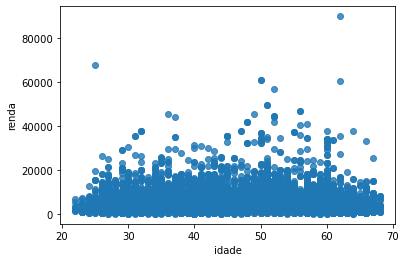

In [33]:


_ = sns.regplot(x = 'idade', y = 'renda', data = df)



Análise item 2:
Grande parte dos indivíduos estão com renda de até 20000, principalmente durante os 20 anos de emprego e entre 30 e 50 anos. 
Entretanto, esta é apenas uma análise superficial:
- A limpeza nos dados é realmente necessária para entender os motivos de tantos outliers. 
- É interessante verificar todas outras variáveis e comparar com os padrões que podem aparecer.

3) Na su aopinião, há outliers na variável renda?

Sim, existem muitos outliers, os pontos mais distantes do aglomerado são evidentes 

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [37]:


df_log = df.copy()

df_log['log_renda'] = np.log(df_log['renda'])

df_log.corr()



,renda,tempo_emprego,posse_de_veiculo,idade,log_renda
renda,1.000000,0.394235,0.063414,0.042570,0.835734
tempo_emprego,0.394235,1.000000,-0.087514,0.323934,0.379556
posse_de_veiculo,0.063414,-0.087514,1.000000,-0.157837,0.090529
idade,0.042570,0.323934,-0.157837,1.000000,0.024712
log_renda,0.835734,0.379556,0.090529,0.024712,1.000000


In [41]:
cmap = sns.diverging_palette(h_neg = 125, h_pos = 350, as_cmap = True, sep = 60, center = 'light')

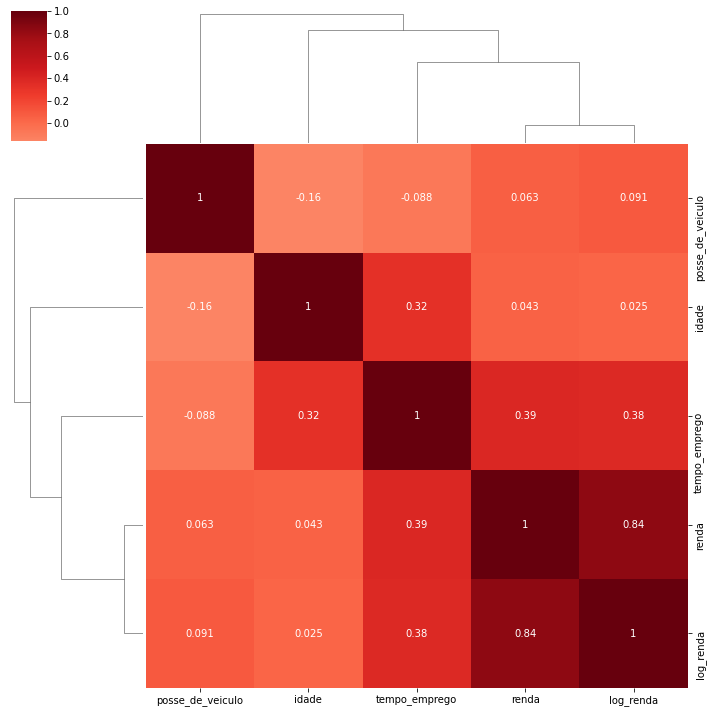

In [45]:

sns.clustermap(df_log.corr(), figsize = (10, 10), annot = True, center = 0, cmap = 'Reds')

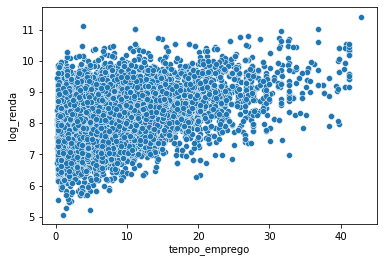

In [50]:
#Gráfico de dispersão com tempo_emprego por log_renda

_ = sns.scatterplot(x = 'tempo_emprego', y = 'log_renda', data = df_log)

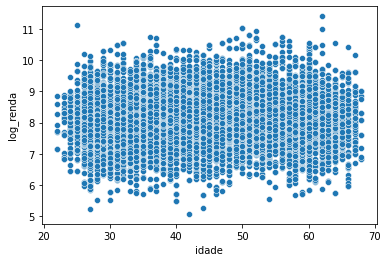

In [51]:
#Gráfico de dispersão com idade por log_renda

_ = sns.scatterplot(x = 'idade', y = 'log_renda', data = df_log)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Em relação ao tempo de emprego, acredito que o Log melhorou a visualização. É possível notar um padrão crescente na renda conforme o tempo de emprego é maior.
Em relação a idade, os outliers ainda causam muitas incertezas. Ainda existe uma grande concentração de indivíduos com renda semelhante, que não varia conforme a idade. 